### Import Packages

In [2]:
# tensorflow
import tensorflow as tf
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

print("Packages Imported")

Packages Imported


### Inputs

In [3]:
cwd = os.getcwd()
in_subpath = "output_final\\1 - Initial Testing"
in_file = "sir_250000_beta_random_gamma_fixed"
in_path = os.path.join(cwd, in_subpath, in_file)

print("Input Path Set")

Input Path Set


## WAVE 1

WAVE 1

Loading Data
Data Loaded

Input Data:
Size: (1, 120)

K # 	 Beta - NN
1 	 0.17881992

MSE: 37451456.812445335


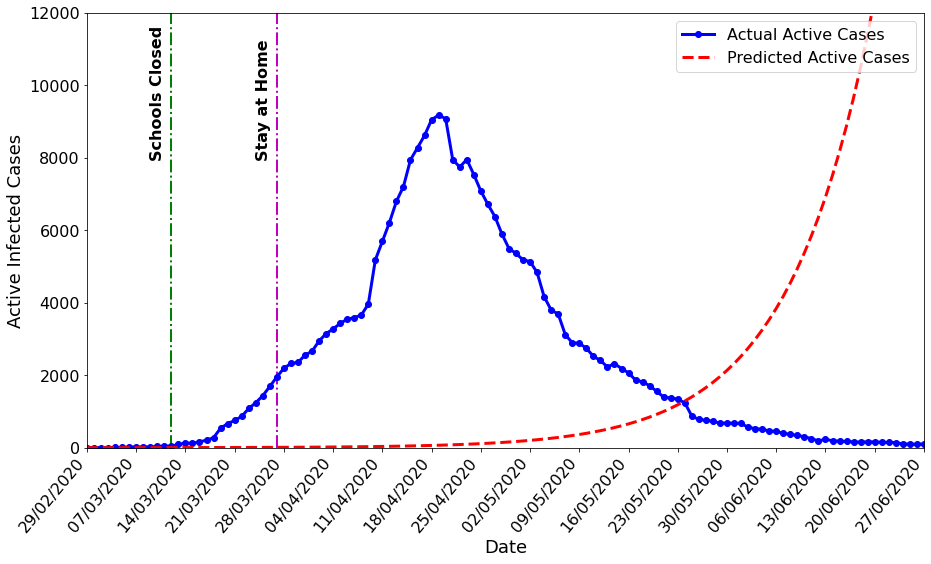

In [17]:
print("WAVE 1")

# LOAD DATA
print("\nLoading Data")
data_raw = pd.read_csv("output_sir_ireland_wave_1_raw.csv", delimiter=',', header=0)
data_eval = data_raw.to_numpy()
print("Data Loaded")

# PROCESS DATA
n_days = 120

x_date = data_eval[:n_days, 0]
x_time = data_eval[:n_days, 1].astype('float64')
x_raw = data_eval[:n_days, 2].astype('float64')

x_all = data_eval[:, 1].astype('float64')

N0 = 4500000

# NORMALISE DATA
x_data = x_raw.reshape(n_days, 1).T
x_data = x_data / N0

x_date_min = x_date[0]
x_date_max = x_date[-1]

print("\nInput Data:")
print("Size: {0}".format(x_data.shape))

# RUN MODEL
preds_n = []
preds_beta = []

model = tf.keras.models.load_model(in_path)

predictions_data = model(x_data)
preds_beta.append(predictions_data[0, 0])

pred_beta = float(np.average(preds_beta))
pred_gamma = 1.0 / 11

print("\nK # \t Beta - NN")
print("{0} \t {1:.8f}".format(1, pred_beta))

# SIMULATE ODE
N = N0
I0 = 1
S0 = N - I0
R0 = 0

S = []
I = []
R = []

S.append(S0)
I.append(I0)
R.append(R0)

for i in range(0, n_days - 1):
    dS = - (pred_beta * S[i] * I[i] / N)
    dI = (pred_beta * S[i] * I[i] / N) - (pred_gamma * I[i])
    dR = (pred_gamma * I[i])

    Snew = S[i] + dS
    Isnew = I[i] + dI
    Rnew = R[i] + dR

    S.append(Snew)
    I.append(Isnew)
    R.append(Rnew)

# CALCULATE MSE
mse = sum(np.abs(I - x_raw)**2) / len(I)
print("\nMSE: {0}".format(mse))

# PLOT RESULTS
x_dates = [x_date[x * 7] for x in range(0, int((n_days - 1) / 7) + 1)]

plt.figure(figsize=(15,8))
plt.plot(x_date, x_raw, "-ob", linewidth=3, label="Actual Active Cases")
plt.plot(x_date, I, "--r", linewidth=3, label="Predicted Active Cases")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Active Infected Cases", fontsize=18)
plt.xticks(x_dates, rotation=50, fontsize=16, ha="right")
plt.yticks(fontsize=16)
plt.xlim(x_date_min, x_date_max)
plt.ylim(0, 12000)
plt.vlines("12/03/2020", ymin=0, ymax=12000, linestyles="dashdot", linewidth=2, colors="g")
plt.vlines("27/03/2020", ymin=0, ymax=12000, linestyles="dashdot", linewidth=2, colors="m")
plt.text("09/03/2020", 8000, "Schools Closed", rotation=90, fontsize=16, fontweight="bold")
plt.text("24/03/2020", 8000, "Stay at Home", rotation=90, fontsize=16, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

## WAVE 2

WAVE 2

Loading Data
Data Loaded

Input Data:
Size: (1, 120)

K # 	 Beta - NN
1 	 0.17832509

MSE: 33711631.65599685


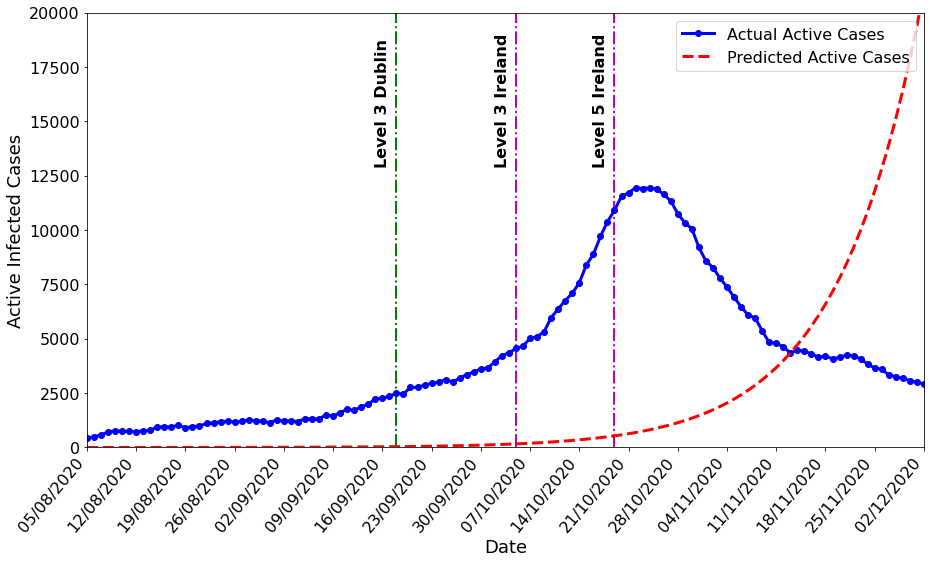

In [18]:
print("WAVE 2")

# LOAD DATA
print("\nLoading Data")
data_raw = pd.read_csv("output_sir_ireland_wave_2_raw.csv", delimiter=',', header=0)
data_eval = data_raw.to_numpy()
print("Data Loaded")

# PROCESS DATA
n_days = 120

x_date = data_eval[:n_days, 0]
x_time = data_eval[:n_days, 1].astype('float64')
x_raw = data_eval[:n_days, 2].astype('float64')

x_all = data_eval[:, 1].astype('float64')

N0 = 4500000

# NORMALISE DATA
x_data = x_raw.reshape(n_days, 1).T
x_data = x_data / N0

x_date_min = x_date[0]
x_date_max = x_date[-1]

print("\nInput Data:")
print("Size: {0}".format(x_data.shape))

# RUN MODEL
preds_n = []
preds_beta = []

model = tf.keras.models.load_model(in_path)

predictions_data = model(x_data)
preds_beta.append(predictions_data[0, 0])

pred_beta = float(np.average(preds_beta))
pred_gamma = 1.0 / 11

print("\nK # \t Beta - NN")
print("{0} \t {1:.8f}".format(1, pred_beta))

# SIMULATE ODE
N = N0
I0 = 1
S0 = N - I0
R0 = 0

S = []
I = []
R = []

S.append(S0)
I.append(I0)
R.append(R0)

for i in range(0, n_days - 1):
    dS = - (pred_beta * S[i] * I[i] / N)
    dI = (pred_beta * S[i] * I[i] / N) - (pred_gamma * I[i])
    dR = (pred_gamma * I[i])

    Snew = S[i] + dS
    Isnew = I[i] + dI
    Rnew = R[i] + dR

    S.append(Snew)
    I.append(Isnew)
    R.append(Rnew)

# CALCULATE MSE
mse = sum(np.abs(I - x_raw)**2) / len(I)
print("\nMSE: {0}".format(mse))

# PLOT RESULTS
x_dates = [x_date[x * 7] for x in range(0, int((n_days - 1) / 7) + 1)]

plt.figure(figsize=(15,8))
plt.plot(x_date, x_raw, "-ob", linewidth=3, label="Actual Active Cases")
plt.plot(x_date, I, "--r", linewidth=3, label="Predicted Active Cases")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Active Infected Cases", fontsize=18)
plt.xticks(x_dates, rotation=50, fontsize=16, ha="right")
plt.yticks(fontsize=16)
plt.xlim(x_date_min, x_date_max)
plt.ylim(0, 20000)
plt.vlines("18/09/2020", ymin=0, ymax=20000, linestyles="dashdot", linewidth=2, colors="g")
plt.vlines("05/10/2020", ymin=0, ymax=20000, linestyles="dashdot", linewidth=2, colors="m")
plt.vlines("19/10/2020", ymin=0, ymax=20000, linestyles="dashdot", linewidth=2, colors="m")
plt.text("15/09/2020", 13000, "Level 3 Dublin", rotation=90, fontsize=16, fontweight="bold")
plt.text("02/10/2020", 13000, "Level 3 Ireland", rotation=90, fontsize=16, fontweight="bold")
plt.text("16/10/2020", 13000, "Level 5 Ireland", rotation=90, fontsize=16, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

## WAVE 3

WAVE 3

Loading Data
Data Loaded

Input Data:
Size: (1, 120)

K # 	 Beta - NN
1 	 0.22273320

MSE: 59573870338.42994


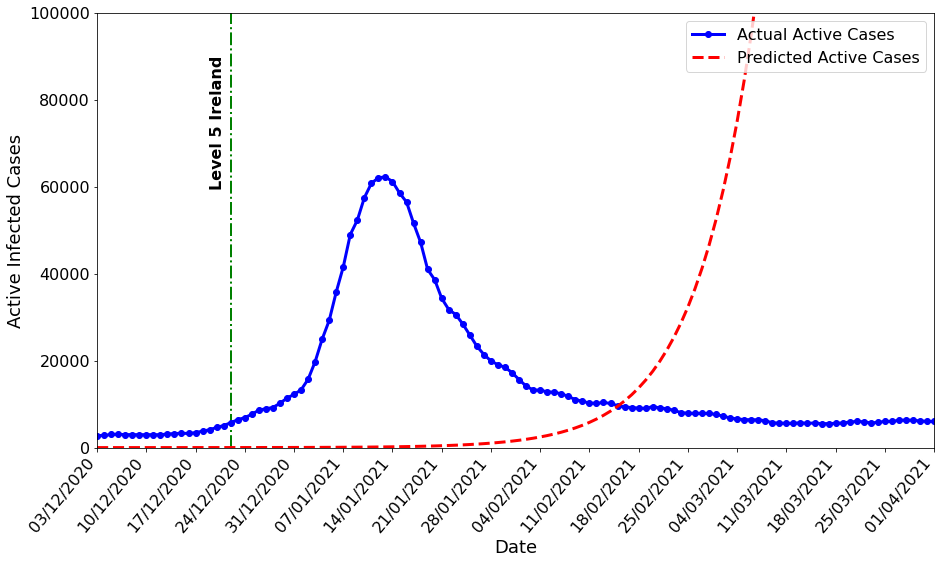

In [19]:
print("WAVE 3")

# LOAD DATA
print("\nLoading Data")
data_raw = pd.read_csv("output_sir_ireland_wave_3_raw.csv", delimiter=',', header=0)
data_eval = data_raw.to_numpy()
print("Data Loaded")

# PROCESS DATA
n_days = 120

x_date = data_eval[:n_days, 0]
x_time = data_eval[:n_days, 1].astype('float64')
x_raw = data_eval[:n_days, 2].astype('float64')

x_all = data_eval[:, 1].astype('float64')

N0 = 4500000

# NORMALISE DATA
x_data = x_raw.reshape(n_days, 1).T
x_data = x_data / N0

x_date_min = x_date[0]
x_date_max = x_date[-1]

print("\nInput Data:")
print("Size: {0}".format(x_data.shape))

# RUN MODEL
preds_n = []
preds_beta = []

model = tf.keras.models.load_model(in_path)

predictions_data = model(x_data)
preds_beta.append(predictions_data[0, 0])

pred_beta = float(np.average(preds_beta))
pred_gamma = 1.0 / 11

print("\nK # \t Beta - NN")
print("{0} \t {1:.8f}".format(1, pred_beta))

# SIMULATE ODE
N = N0
I0 = 1
S0 = N - I0
R0 = 0

S = []
I = []
R = []

S.append(S0)
I.append(I0)
R.append(R0)

for i in range(0, n_days - 1):
    dS = - (pred_beta * S[i] * I[i] / N)
    dI = (pred_beta * S[i] * I[i] / N) - (pred_gamma * I[i])
    dR = (pred_gamma * I[i])

    Snew = S[i] + dS
    Isnew = I[i] + dI
    Rnew = R[i] + dR

    S.append(Snew)
    I.append(Isnew)
    R.append(Rnew)

# CALCULATE MSE
mse = sum(np.abs(I - x_raw)**2) / len(I)
print("\nMSE: {0}".format(mse))

# PLOT RESULTS
x_dates = [x_date[x * 7] for x in range(0, int((n_days - 1) / 7) + 1)]
plt.figure(figsize=(15,8))
plt.plot(x_date, x_raw, "-ob", linewidth=3, label="Actual Active Cases")
plt.plot(x_date, I, "--r", linewidth=3, label="Predicted Active Cases")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Active Infected Cases", fontsize=18)
plt.xticks(x_dates, rotation=50, fontsize=16, ha="right")
plt.yticks(fontsize=16)
plt.xlim(x_date_min, x_date_max)
plt.ylim(0, 100000)
plt.vlines("22/12/2020", ymin=0, ymax=100000, linestyles="dashdot", linewidth=2, colors="g")
plt.text("19/12/2020", 60000, "Level 5 Ireland", rotation=90, fontsize=16, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

## WAVE 4

WAVE 4

Loading Data
Data Loaded

Input Data:
Size: (1, 120)

K # 	 Beta - NN
1 	 0.18330368

MSE: 104308302.95616205


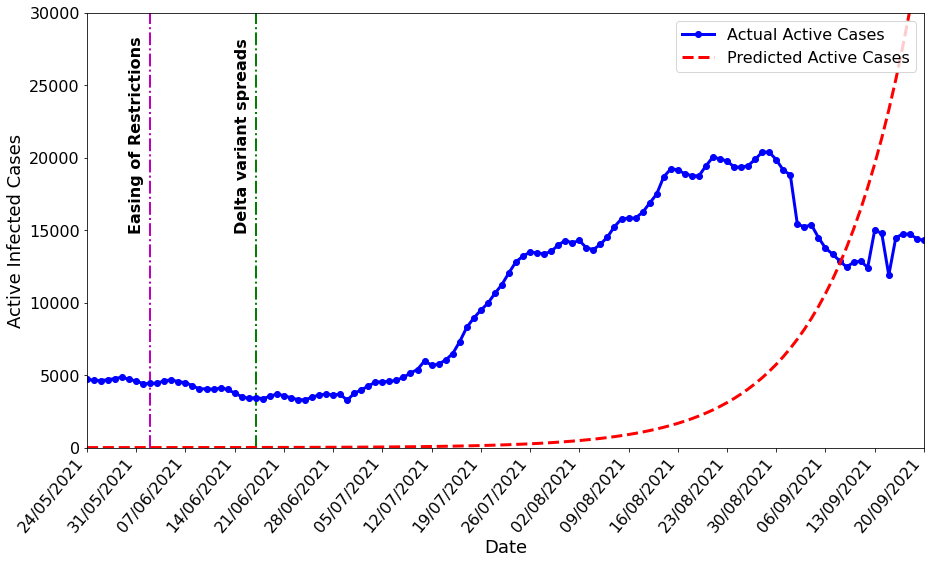

In [18]:
print("WAVE 4")

# LOAD DATA
print("\nLoading Data")
data_raw = pd.read_csv("output_sir_ireland_wave_4_raw.csv", delimiter=',', header=0)
data_eval = data_raw.to_numpy()
print("Data Loaded")

# PROCESS DATA
n_days = 120

x_date = data_eval[:n_days, 0]
x_time = data_eval[:n_days, 1].astype('float64')
x_raw = data_eval[:n_days, 2].astype('float64')

x_all = data_eval[:, 1].astype('float64')

N0 = 4500000

# NORMALISE DATA
x_data = x_raw.reshape(n_days, 1).T
x_data = x_data / N0

x_date_min = x_date[0]
x_date_max = x_date[-1]

print("\nInput Data:")
print("Size: {0}".format(x_data.shape))

# RUN MODEL
preds_n = []
preds_beta = []

model = tf.keras.models.load_model(in_path)

predictions_data = model(x_data)
preds_beta.append(predictions_data[0, 0])

pred_beta = float(np.average(preds_beta))
pred_gamma = 1.0 / 11

print("\nK # \t Beta - NN")
print("{0} \t {1:.8f}".format(1, pred_beta))

# SIMULATE ODE
N = N0
I0 = 1
S0 = N - I0
R0 = 0

S = []
I = []
R = []

S.append(S0)
I.append(I0)
R.append(R0)

for i in range(0, n_days - 1):
    dS = - (pred_beta * S[i] * I[i] / N)
    dI = (pred_beta * S[i] * I[i] / N) - (pred_gamma * I[i])
    dR = (pred_gamma * I[i])

    Snew = S[i] + dS
    Isnew = I[i] + dI
    Rnew = R[i] + dR

    S.append(Snew)
    I.append(Isnew)
    R.append(Rnew)

# CALCULATE MSE
mse = sum(np.abs(I - x_raw)**2) / len(I)
print("\nMSE: {0}".format(mse))

# PLOT RESULTS
x_dates = [x_date[x * 7] for x in range(0, int((n_days - 1) / 7) + 1)]
plt.figure(figsize=(15,8))
plt.plot(x_date, x_raw, "-ob", linewidth=3, label="Actual Active Cases")
plt.plot(x_date, I, "--r", linewidth=3, label="Predicted Active Cases")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Active Infected Cases", fontsize=18)
plt.xticks(x_dates, rotation=50, fontsize=16, ha="right")
plt.yticks(fontsize=16)
plt.xlim(x_date_min, x_date_max)
plt.ylim(0, 30000)
plt.vlines("17/06/2021", ymin=0, ymax=30000, linestyles="dashdot", linewidth=2, colors="g")
plt.vlines("02/06/2021", ymin=0, ymax=30000, linestyles="dashdot", linewidth=2, colors="m")
plt.text("14/06/2021", 15000, "Delta variant spreads", rotation=90, fontsize=16, fontweight="bold")
plt.text("30/05/2021", 15000, "Easing of Restrictions", rotation=90, fontsize=16, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()